In [1]:
import tensorflow as tf

In [2]:
import os
import sys
import collections

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)

In [5]:
from rl import action_learner

In [6]:
from rl import value_estimator

In [7]:
from progress_learner import EventProgressEstimator

In [8]:
import config
import project
# Need to add this import to load class
from project import Project

In [9]:
from importlib import reload

In [10]:
# To load this, I have to add pickle.load(f, encoding='latin-1')
# Otherwise it would give the bug
# https://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte
p = project.Project.load("../slidearound_hopstep_1.proj")

In [11]:
reload(config)
    
c = config.Config()

In [12]:
from rl import block_movement_env

In [48]:
reload(action_learner)


<module 'rl.action_learner' from 'D:\\git\\learn-to-perform\\rl\\action_learner.py'>

In [77]:
reload(value_estimator)

<module 'rl.value_estimator' from 'D:\\git\\learn-to-perform\\rl\\value_estimator.py'>

In [33]:
p.speed

0.083696821297196897

In [13]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Test progress_estimator in a simulator

In [14]:
reload(block_movement_env)
tf.reset_default_graph()

sess =  tf.Session()

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

saver = tf.train.Saver()
saver.restore(sess, '../progress.mod')

env = block_movement_env.BlockMovementEnv(c, p.speed, name = 'SlideAround', 
                       progress_estimator = progress_estimator, session = sess)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
INFO:tensorflow:Restoring parameters from ../progress.mod


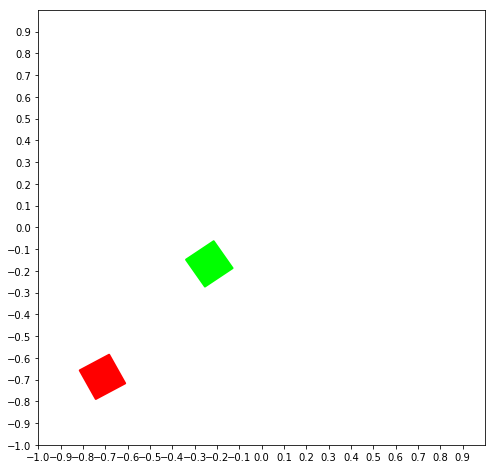

In [15]:
env.default()
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.10


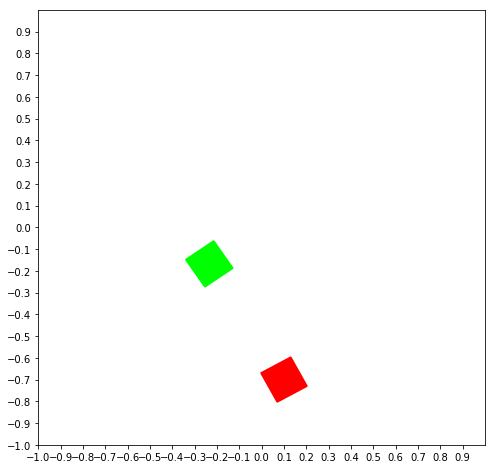

In [16]:
env.step((0, [0.1, -0.7, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.34


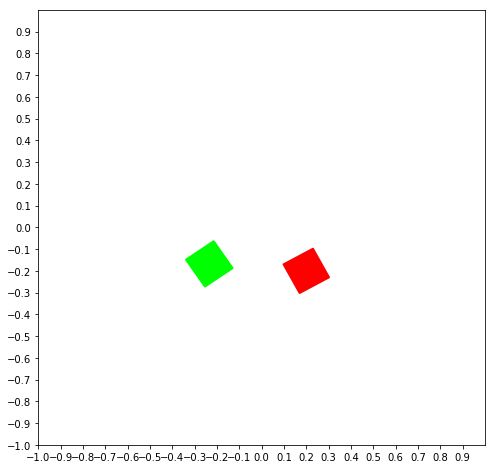

In [17]:
env.step((0, [0.2, -0.2, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.70


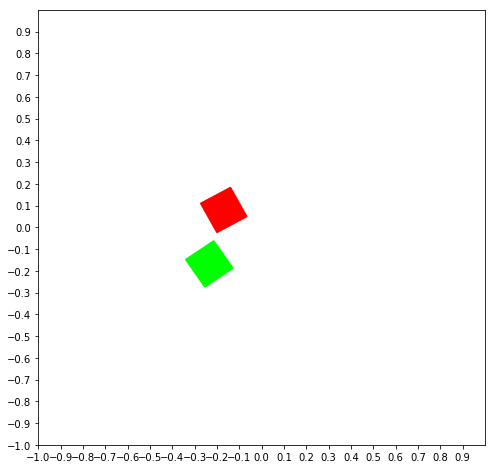

In [18]:
env.step((0, [-0.17, 0.08, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.76


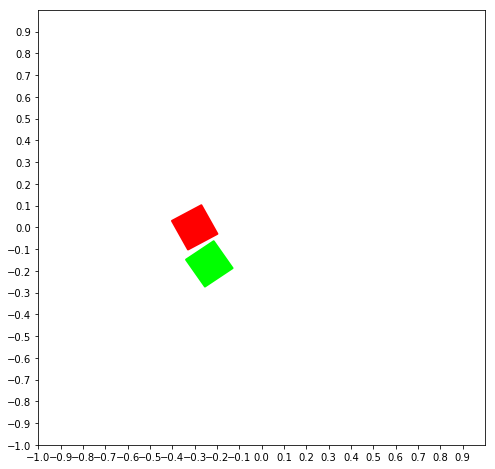

In [19]:
env.step((0, [-0.3, 0, 0.5]))
env.render()

## Run reinforce algorithm

In [17]:
reload(config)
    
c = config.Config()
reload(block_movement_env)
reload(value_estimator)
reload(action_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

with tf.Session() as sess:
    policy_est = value_estimator.PolicyEstimator(c)
    value_est = value_estimator.ValueEstimator(c)
    
    sess.run(tf.global_variables_initializer())
    
    with tf.variable_scope("model") as scope:
        print('-------- Load progress model ---------')
        progress_estimator = EventPro`gressEstimator(is_training=False, name = p.name, config = c)  
    
    # Print out all variables that would be restored
    for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
        print (variable.name)

    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
    saver.restore(sess, '../progress.mod')
    
    action_ln = action_learner.ActionLearner(c, p, progress_estimator, 
                                   policy_est, value_est)
    
    stats = action_ln.reinforce()

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod
state = [ 0.26775153 -0.87406082  0.89296617  0.26775153 -0.87406082  0.89296617
  0.03869011 -0.64937677  0.35522867  0.03869011 -0.64937677  0.35522867]
action_means = [ 0.  0.  0.] ; action_stds = [ 0.67890203  0.70737988  0.72061425]
action = [-0.00280289 -0.58948388 -0.23723666]
Step 0 @ Episode 1/30 (0.0)state = [ 0.26775153 -0.87406082  0.89296617  0.26775153 -0.87406082  0.89296617
  0.03869011 -0.64937677  0.35522867  0.03869011 -0.64937677  

Step 4 @ Episode 2/30 (0.04850586364045739)state = [ 0.19336326 -0.61137512 -1.45376485  1.00793596  0.02605864  1.10671578
  0.73699868 -0.70872529  0.45686002  0.73699868 -0.70872529  0.45686002]
action_means = [ 0.23434687 -0.17636093 -0.642003  ] ; action_stds = [ 0.8099696   0.71955734  0.81830472]
action = [-1.62796844  0.07716166 -1.17438052]
Step 5 @ Episode 2/30 (0.04850586364045739)state = [ 0.92425487  0.02768098  1.03429865 -1.62796844  0.07716166 -1.17438052
  0.73699868 -0.70872529  0.45686002  0.73699868 -0.70872529  0.45686002]
action_means = [-0.1330328   0.07108635 -0.35190678] ; action_stds = [ 0.79459286  0.77293581  1.02962053]
action = [ 0.14226864  0.65548444  0.45036096]
Step 6 @ Episode 2/30 (0.04850586364045739)state = [-1.54840958  0.10315292 -1.1013606   0.14226864  0.65548444  0.45036096
  0.73699868 -0.70872529  0.45686002  0.73699868 -0.70872529  0.45686002]
action_means = [ 0.18534231 -0.23129734 -0.73446393] ; action_stds = [ 0.6369617   0.69322765  0.8

Step 7 @ Episode 4/30 (0.6756640076637268)state = [-0.45095504  0.53821163 -1.55348182 -1.0744412  -0.33814414 -1.9833172
  0.85899598  0.67132058  1.46884917  0.85899598  0.67132058  1.46884917]
action_means = [-0.25343451 -0.55488539 -0.80026537] ; action_stds = [ 0.61572677  0.92309666  1.23351288]
action = [ 0.50245391  0.43357847 -0.7823481 ]
Step 8 @ Episode 4/30 (0.6756640076637268)state = [-0.99926427 -0.30135302 -1.92606218  0.50245391  0.43357847 -0.7823481
  0.85899598  0.67132058  1.46884917  0.85899598  0.67132058  1.46884917]
action_means = [ 0.12519963 -0.50788379 -0.87865323] ; action_stds = [ 0.7388804   1.04542422  1.26670289]
action = [ 0.17686994 -1.30703428  0.02871614]
Step 9 @ Episode 4/30 (0.6756640076637268)state = [ 0.48706521  0.35130851 -0.74401319  0.17686994 -1.30703428  0.02871614
  0.85899598  0.67132058  1.46884917  0.85899598  0.67132058  1.46884917]
action_means = [-0.10915029 -0.61901575 -0.6749317 ] ; action_stds = [ 0.95845377  1.10780168  1.564764

Step 11 @ Episode 5/30 (0.10770686529576778)state = [ 0.33417158  0.08772822  0.74142778  1.18945948 -0.02934723  1.53059396
 -0.83152871  0.88863378  0.59726316 -0.83152871  0.88863378  0.59726316]
action_means = [ 0.37368438  0.23814179  0.33945125] ; action_stds = [ 1.1074506   0.95025986  0.83244914]
action = [ 1.09826402  0.89990071 -0.4468974 ]
Step 12 @ Episode 5/30 (0.10770686529576778)state = [ 1.18128483  0.05394943  1.35333403  1.09826402  0.89990071 -0.4468974
 -0.83152871  0.88863378  0.59726316 -0.83152871  0.88863378  0.59726316]
action_means = [ 0.0759689   0.34973437  0.37018305] ; action_stds = [ 1.28413117  1.06571281  0.82216704]
action = [-1.5862762   2.07734913  0.03930235]
Step 13 @ Episode 5/30 (0.10770686529576778)state = [ 1.02161565  0.93351894 -0.43301554 -1.5862762   2.07734913  0.03930235
 -0.83152871  0.88863378  0.59726316 -0.83152871  0.88863378  0.59726316]
action_means = [ 0.00760763  0.49811769  0.10576093] ; action_stds = [ 1.05107176  0.91579515  0

Step 16 @ Episode 6/30 (0.33558343537151814)state = [ 0.40365727  0.15132588 -0.44571045 -0.04106212  0.08779699 -0.11172224
 -0.72861222 -0.76517065  0.32534672 -0.72861222 -0.76517065  0.32534672]
action_means = [ 0.10144204 -0.09503824 -0.27035764] ; action_stds = [ 0.55682355  0.46583524  0.74490303]
action = [ 0.38548563 -0.24494766 -0.07640547]
Step 17 @ Episode 6/30 (0.33558343537151814)state = [ 0.02493021  0.03631718 -0.10625829  0.38548563 -0.24494766 -0.07640547
 -0.72861222 -0.76517065  0.32534672 -0.72861222 -0.76517065  0.32534672]
action_means = [ 0.12945597 -0.15158737 -0.1919041 ] ; action_stds = [ 0.53808868  0.45094246  0.71629465]
action = [ 0.31561047 -0.22645389 -1.20279459]
Step 18 @ Episode 6/30 (0.33558343537151814)state = [ 0.01592926  0.04333871 -0.10700354  0.31561047 -0.22645389 -1.20279459
 -0.72861222 -0.76517065  0.32534672 -0.72861222 -0.76517065  0.32534672]
action_means = [-0.05690193 -0.21296595 -0.21766306] ; action_stds = [ 0.47906601  0.41362822  

Step 1 @ Episode 8/30 (0.019593161530792713)state = [-1.71689684 -0.98976162  1.9779287   0.04944581 -0.06588454  0.60987383
 -0.80627293 -0.78343536  1.36144049 -0.80627293 -0.78343536  1.36144049]
action_means = [ 0.41439551 -0.13829949 -0.36636633] ; action_stds = [ 0.66324127  0.9240253   1.26546502]
action = [ 0.0904045   1.98285534  1.12496745]
Step 2 @ Episode 8/30 (0.019593161530792713)state = [ 0.05111876  0.01779556  0.63091266  0.0904045   1.98285534  1.12496745
 -0.80627293 -0.78343536  1.36144049 -0.80627293 -0.78343536  1.36144049]
action_means = [ 0.31190413  0.2374554  -0.52552801] ; action_stds = [ 1.19471169  1.21189451  1.6762538 ]
action = [ 0.97534808  1.13119716 -0.17146982]
Step 3 @ Episode 8/30 (0.019593161530792713)state = [ 0.15071036  1.92481776  1.0366197   0.97534808  1.13119716 -0.17146982
 -0.80627293 -0.78343536  1.36144049 -0.80627293 -0.78343536  1.36144049]
action_means = [ 0.0690501   0.01115745 -0.34567714] ; action_stds = [ 1.12405992  1.27580285  

Step 5 @ Episode 9/30 (0.3400314864702523)state = [-0.6610348   0.007511    0.72661277  0.26775009 -0.87870343 -1.18718888
 -0.42895483 -0.71229923  1.04165686 -0.42895483 -0.71229923  1.04165686]
action_means = [-0.17014939 -0.3890956  -0.32855061] ; action_stds = [ 0.44308442  0.88662314  1.28009295]
action = [-0.28870217  0.87385895  1.53933172]
Step 6 @ Episode 9/30 (0.3400314864702523)state = [ 0.24242174 -0.79893105 -1.06308429 -0.28870217  0.87385895  1.53933172
 -0.42895483 -0.71229923  1.04165686 -0.42895483 -0.71229923  1.04165686]
action_means = [  7.36918300e-04   1.77851677e-01  -7.73047984e-01] ; action_stds = [ 0.83019894  0.97465378  1.24584007]
action = [ 0.70362365  1.65799329 -1.32190717]
Step 7 @ Episode 9/30 (0.3400314864702523)state = [-0.22303313  0.92575053  1.34998382  0.70362365  1.65799329 -1.32190717
 -0.42895483 -0.71229923  1.04165686 -0.42895483 -0.71229923  1.04165686]
action_means = [-0.10177694 -0.00261413 -0.22760168] ; action_stds = [ 0.9877125   1.2

Step 3 @ Episode 11/30 (0.7213046588003635)state = [-1.65157456  1.55509596  2.33614788 -0.91207238  2.02222494  4.07295043
 -0.85068765 -0.0530604   1.24469835 -0.85068765 -0.0530604   1.24469835]
action_means = [ 0.23566458  0.84704483 -0.24061403] ; action_stds = [ 1.95886314  1.69360149  1.88604581]
action = [-1.40745325  1.37035492  1.65535743]
Step 4 @ Episode 11/30 (0.7213046588003635)state = [-0.96271332  1.95558671  3.82580895 -1.40745325  1.37035492  1.65535743
 -0.85068765 -0.0530604   1.24469835 -0.85068765 -0.0530604   1.24469835]
action_means = [-0.03919167  0.35482705  0.15274386] ; action_stds = [ 1.75643957  1.74380755  1.88181841]
action = [-2.66535847  2.98353665  3.13121332]
Step 5 @ Episode 11/30 (0.7213046588003635)state = [-1.45891988  1.43635752  1.71574141 -2.66535847  2.98353665  3.13121332
 -0.85068765 -0.0530604   1.24469835 -0.85068765 -0.0530604   1.24469835]
action_means = [ 0.04882519  0.86120856 -0.65372849] ; action_stds = [ 1.77353442  1.67787933  2.0

Step 9 @ Episode 12/30 (0.018295178189873695)state = [ 0.00284334 -0.37625292 -0.13142176  0.13110351 -0.56227422 -0.79823805
 -0.7277952  -0.51379211  0.45082268 -0.7277952  -0.51379211  0.45082268]
action_means = [-0.11803827 -0.00084738  0.06203963] ; action_stds = [ 0.31594154  0.77246022  0.88087261]
action = [ 0.03170689 -0.00417306  0.87754463]
Step 10 @ Episode 12/30 (0.018295178189873695)state = [ 0.11642821 -0.47987401 -0.55081904  0.03170689 -0.00417306  0.87754463
 -0.7277952  -0.51379211  0.45082268 -0.7277952  -0.51379211  0.45082268]
action_means = [ 0.00517026  0.41654283 -0.20837879] ; action_stds = [ 0.50508863  0.74579924  0.91957247]
action = [-0.48733833  1.0496037  -0.79399923]
Step 11 @ Episode 12/30 (0.018295178189873695)state = [-0.00527573  0.07090985  0.75844504 -0.48733833  1.0496037  -0.79399923
 -0.7277952  -0.51379211  0.45082268 -0.7277952  -0.51379211  0.45082268]
action_means = [-0.13730486  0.12850755  0.1338778 ] ; action_stds = [ 0.60212201  0.85699

Step 13 @ Episode 13/30 (0.010360597632825375)state = [ 2.27984259 -0.85726123 -2.22548516 -1.24038397 -2.07696636 -0.01453798
  0.82885174 -0.20666359  0.72779114  0.82885174 -0.20666359  0.72779114]
action_means = [-0.28638807 -0.77721143 -1.24806213] ; action_stds = [ 0.42433214  0.95120013  1.57211673]
action = [-0.21202722 -1.31386026 -3.94101261]
Step 14 @ Episode 13/30 (0.010360597632825375)state = [-1.17317133 -2.02709031 -0.27116944 -0.21202722 -1.31386026 -3.94101261
  0.82885174 -0.20666359  0.72779114  0.82885174 -0.20666359  0.72779114]
action_means = [ 0.24944086 -1.62865639 -0.42166531] ; action_stds = [ 0.10863864  1.25116515  1.25535178]
action = [ 0.40025243 -3.88553061 -0.86300077]
Step 15 @ Episode 13/30 (0.010360597632825375)state = [-0.192642   -1.39528121 -3.84356052  0.40025243 -3.88553061 -0.86300077
  0.82885174 -0.20666359  0.72779114  0.82885174 -0.20666359  0.72779114]
action_means = [ 0.06580429 -0.87008405 -1.20739591] ; action_stds = [ 0.06601114  1.0411

Step 17 @ Episode 14/30 (0.027674470096826553)state = [-1.30896093 -1.28026453 -1.92222445 -1.3933339  -1.33381776 -1.33851968
 -0.0879624   0.2877052   1.00528675 -0.0879624   0.2877052   1.00528675]
action_means = [-1.23347628 -0.56414306 -1.70760977] ; action_stds = [ 0.06366916  0.84182042  0.88324112]
action = [-1.18097861 -0.54861238 -1.17154656]
Step 18 @ Episode 14/30 (0.027674470096826553)state = [-1.37148344 -1.25302348 -1.32133886 -1.18097861 -0.54861238 -1.17154656
 -0.0879624   0.2877052   1.00528675 -0.0879624   0.2877052   1.00528675]
action_means = [-0.87752485 -0.47793788 -1.53108764] ; action_stds = [ 0.116567    0.88128692  0.90423584]
action = [-1.04766985 -0.86201239 -2.55873587]
Step 19 @ Episode 14/30 (0.027674470096826553)state = [-0.93061774 -0.35576784  0.10811165 -0.93061774 -0.35576784  0.10811165
 -0.43501078  0.34865213  0.63457596 -0.43501078  0.34865213  0.63457596]
action_means = [        nan -0.00636996 -0.84184438] ; action_stds = [        nan  0.7348

Traceback (most recent call last):
  File "D:\git\learn-to-perform\rl\action_learner.py", line 96, in reinforce
    next_state, reward, done, _ = self.env.step((select_object,action))
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\wrappers\time_limit.py", line 36, in _step
    observation, reward, done, info = self.env.step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 138, in _step
    observation, progress = self.get_observation_and_progress()
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 164, in get_observation_and_progress
    inputs = self._get_features(last_num_steps_frames)[-self.num_steps:]
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 294, in _get_features
    retu

{0: [Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417], Cube : [        nan  0.35089981 -0.57158417]], 1: [Cube : [ 0.16112431 -0.8

Traceback (most recent call last):
  File "D:\git\learn-to-perform\rl\action_learner.py", line 96, in reinforce
    next_state, reward, done, _ = self.env.step((select_object,action))
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\wrappers\time_limit.py", line 36, in _step
    observation, reward, done, info = self.env.step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 138, in _step
    observation, progress = self.get_observation_and_progress()
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 164, in get_observation_and_progress
    inputs = self._get_features(last_num_steps_frames)[-self.num_steps:]
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 294, in _get_features
    retu

Value error in qsr_feature_extractor
{0: [Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.78183166], Cube : [        nan -1.10016801 -0.781

Traceback (most recent call last):
  File "D:\git\learn-to-perform\rl\action_learner.py", line 96, in reinforce
    next_state, reward, done, _ = self.env.step((select_object,action))
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\wrappers\time_limit.py", line 36, in _step
    observation, reward, done, info = self.env.step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 138, in _step
    observation, progress = self.get_observation_and_progress()
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 164, in get_observation_and_progress
    inputs = self._get_features(last_num_steps_frames)[-self.num_steps:]
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 294, in _get_features
    retu

action = [        nan -0.44013103 -0.26402553]
Value error in qsr_feature_extractor
{0: [Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26402553], Cube : [        nan -0.44013103 -0.26

Traceback (most recent call last):
  File "D:\git\learn-to-perform\rl\action_learner.py", line 96, in reinforce
    next_state, reward, done, _ = self.env.step((select_object,action))
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\wrappers\time_limit.py", line 36, in _step
    observation, reward, done, info = self.env.step(action)
  File "C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\gym\core.py", line 96, in step
    return self._step(action)
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 138, in _step
    observation, progress = self.get_observation_and_progress()
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 164, in get_observation_and_progress
    inputs = self._get_features(last_num_steps_frames)[-self.num_steps:]
  File "D:\git\learn-to-perform\rl\block_movement_env.py", line 294, in _get_features
    retu

## Following is one of the decent run 

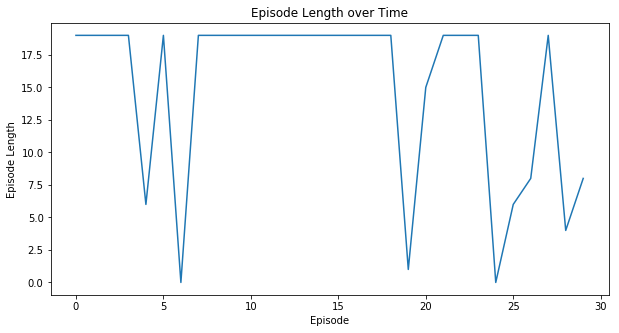

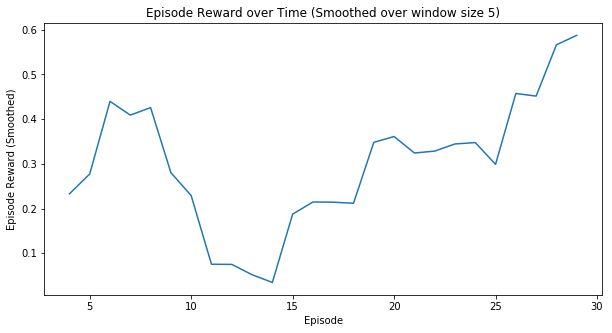

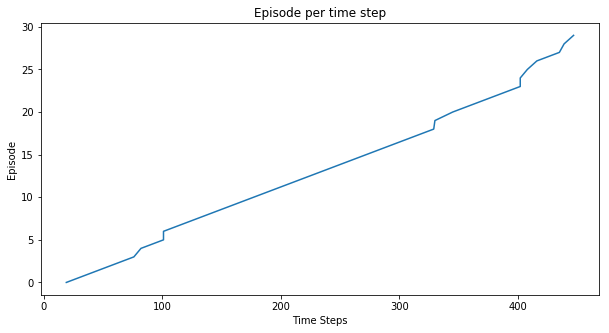

(<matplotlib.figure.Figure at 0x1cd56373240>,
 <matplotlib.figure.Figure at 0x1cd5a7feac8>)

In [15]:
import plotting
plotting.plot_episode_stats(stats, smoothing_window=5)

In [ ]:
plotting.plot_episode_stats(stats, smoothing_window=5)